# Hand Written Digit Classification with CNN

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

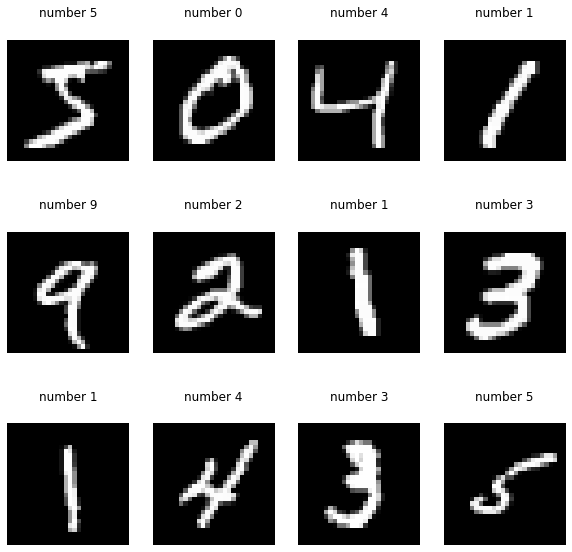

In [4]:
#displaying the dataset
%matplotlib inline
fig,axs = plt.subplots(3,4, figsize=(10,10))
for i,ax in enumerate(axs.flat):
    plt.gray()
    ax.matshow(x_train[i])
    ax.axis("off")
    ax.set_title("number {}".format(y_train[i]))


In [4]:
#before normalizing
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Resizing

In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28, 28, 1)
print("x_train shape:",x_train.shape)
print("number of images in train:",x_train.shape[0])
print("number of images in test:",x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
number of images in train: 60000
number of images in test: 10000


## Normalizing

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255
x_train/= 255
print(x_train[0])

[[[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]]

 [[0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.0000000e+00]
  [0.000

## BUILDING THE MODEL

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Dropout
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#hidden layer
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
#output layer
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6037 - accuracy: 0.8175
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2275 - accuracy: 0.9319
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1642 - accuracy: 0.9502
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1320 - accuracy: 0.9600
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1129 - accuracy: 0.9654


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 3662.5105 - accuracy: 0.9689


[3662.510498046875, 0.9689000248908997]

### PREDICTING 

(-0.5, 27.5, 27.5, -0.5)

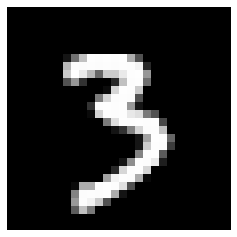

In [10]:
plt.matshow(x_test[30])
plt.axis("off")

In [11]:
y_predicted=model.predict(x_test)
y_predicted[30]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
np.argmax(y_predicted[30])

3

#### DIGIT DETECTION

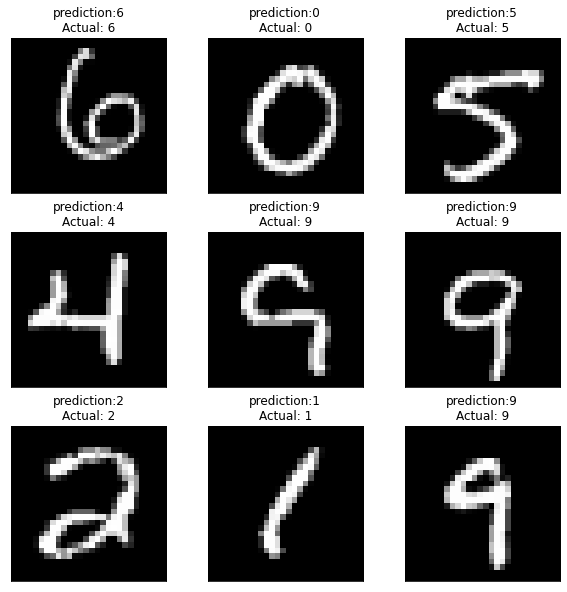

In [96]:
fig,axs = plt.subplots(3,3, figsize=(10,10))
fig.subplots_adjust(hspace = 0.25)
axs=axs.flatten()
batch=y_test[100:109]
for i,img in enumerate(x_test[100:109]):
            title=("prediction:{}\nActual: {}".format(np.array(np.argmax(y_predicted[100+i])),batch[i]))
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            axs[i].imshow(img)
    
plt.show()